In [28]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [29]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [30]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


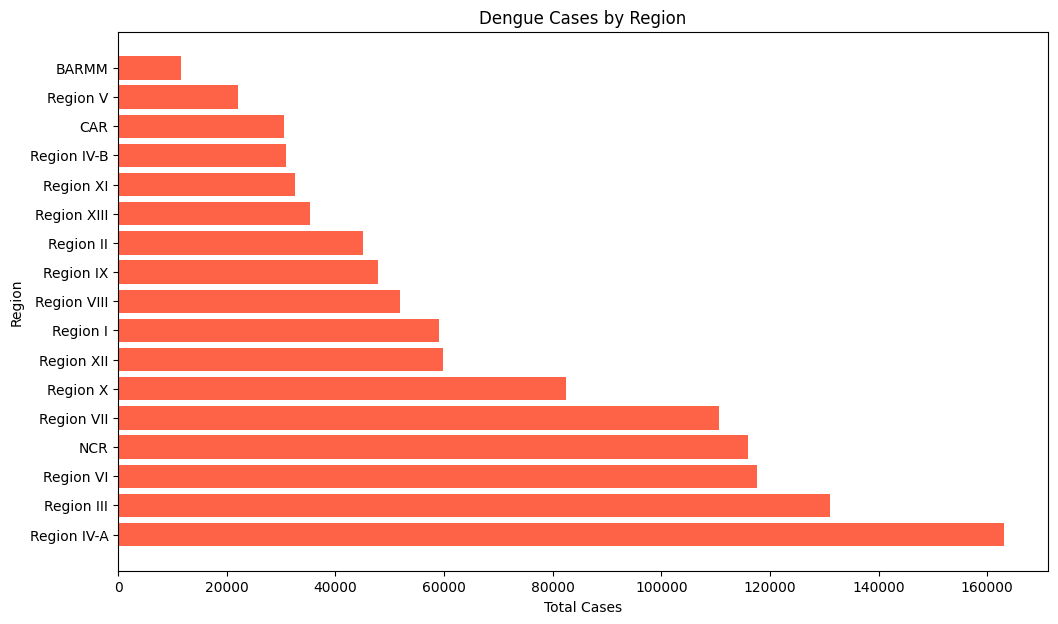

In [98]:
cases_by_region = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
plt.barh(cases_by_region.index, cases_by_region.values, color='tomato')
plt.title("Dengue Cases by Region")
plt.xlabel("Total Cases")
plt.ylabel("Region")
plt.show()

<h1>Insight 1</h1>

<h2>The graph shows that Region IV-A and Region III had the highest total of dengue cases, indicating these areas experience the most severe outbreaks.</h2>
<hr>

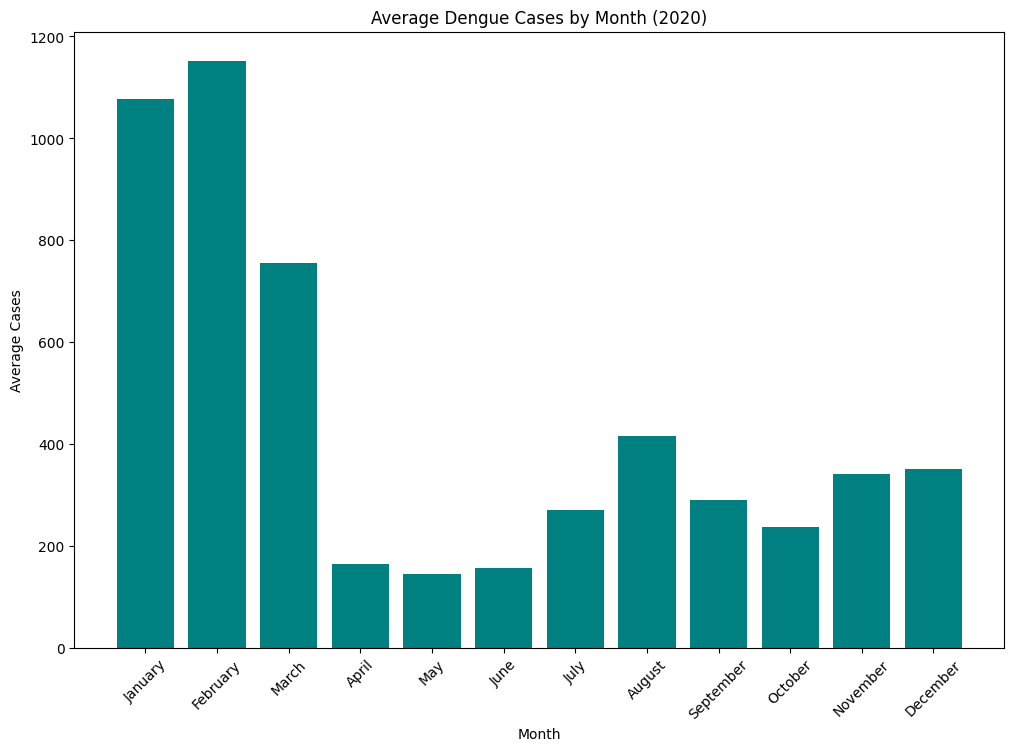

In [74]:
dengue_2020 = dengue[dengue["Year"] == 2020]
avg_case = dengue_2020.groupby("Month")["Dengue_Cases"].mean().reindex(month_order)

plt.bar(avg_case.index, avg_case.values, color='teal')
plt.title("Average Dengue Cases by Month (2020)")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.gcf().set_size_inches(12,8)
plt.xticks(rotation=45)
plt.show()

<h1>Insight 2</h1>

<h2>The graph shows that January and February had the highest number of dengue cases in the year 2020, while the rest of the months recorded fewer cases.</h2>
<hr>

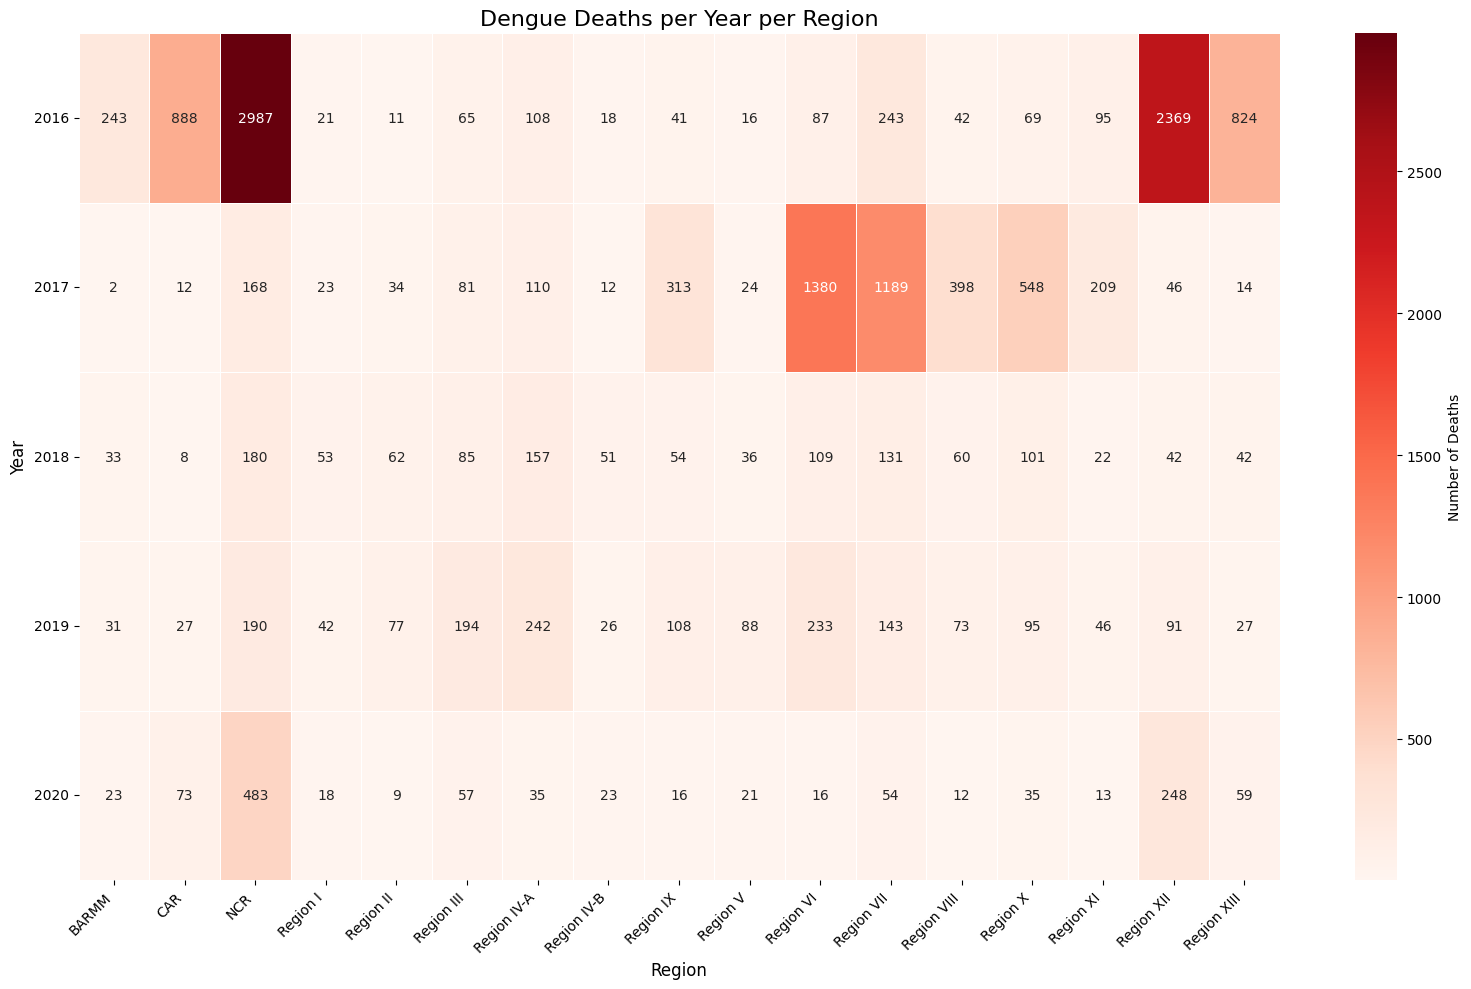

In [26]:
# Group by Year and Region, summing deaths
heatmap_data = dengue.groupby(['Year', 'Region'])['Dengue_Deaths'].sum().unstack()

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=.5, cbar_kws={'label': 'Number of Deaths'})
plt.title('Dengue Deaths per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Insight 3</h2>

<h2>This shows that some years experienced significant dengue outbreaks, marked by higher death counts across regions.</h2>

<h1>Insight 4</h1>

<h2>This shows that NCR had a very high number of dengue deaths in 2016, making it the worst-affected region on that year.</h2>

<h1>Insight 5</h1>

<h2>From 2018 onward, most regions recorded fewer deaths, showing that dengue control and prevention efforts have become more effective.</h2>
<hr>

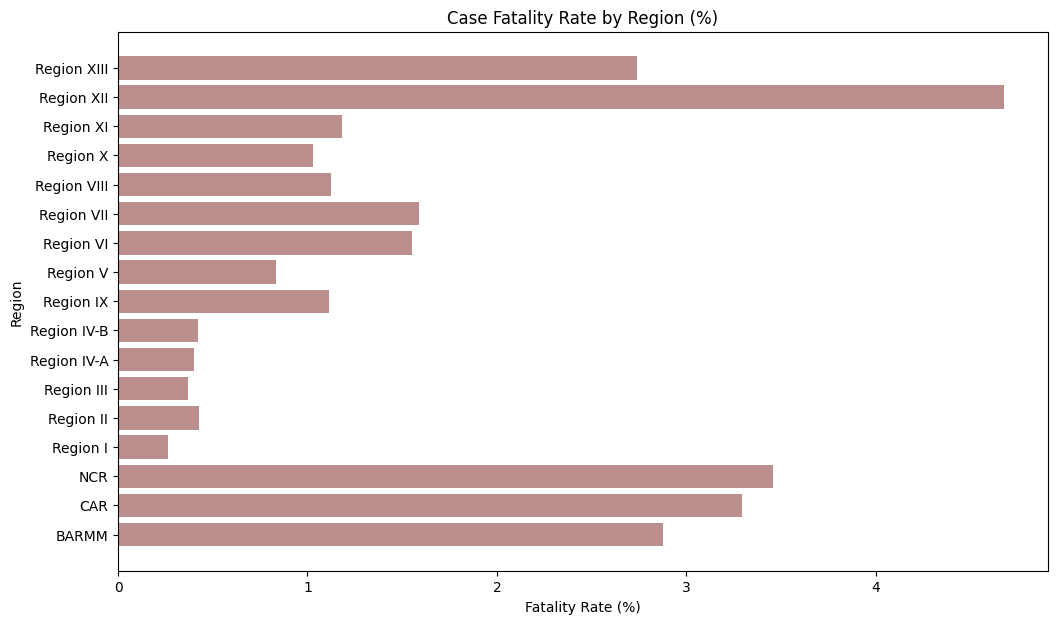

In [103]:
fatality_rate = (dengue.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum())
fatality_rate["Fatality_Rate (%)"] = (fatality_rate["Dengue_Deaths"] / fatality_rate["Dengue_Cases"]) * 100

plt.figure(figsize=(12,7))
plt.barh(fatality_rate.index, fatality_rate["Fatality_Rate (%)"], color='rosybrown')
plt.title("Case Fatality Rate by Region (%)")
plt.xlabel("Fatality Rate (%)")
plt.ylabel("Region")
plt.show()

<h1>Insight 6</h1>

<h2>The graph shows that Region XII has the highest dengue fatality rate, meaning more people with dengue died, compared in the other regions.
</h2>

<h1>Insight 7 </h1>

<h2>It indicates that most regions have low dengue fatality rates, suggesting effective disease management, while a few regions show higher mortality that may need closer health intervention.
</h2>
<hr>

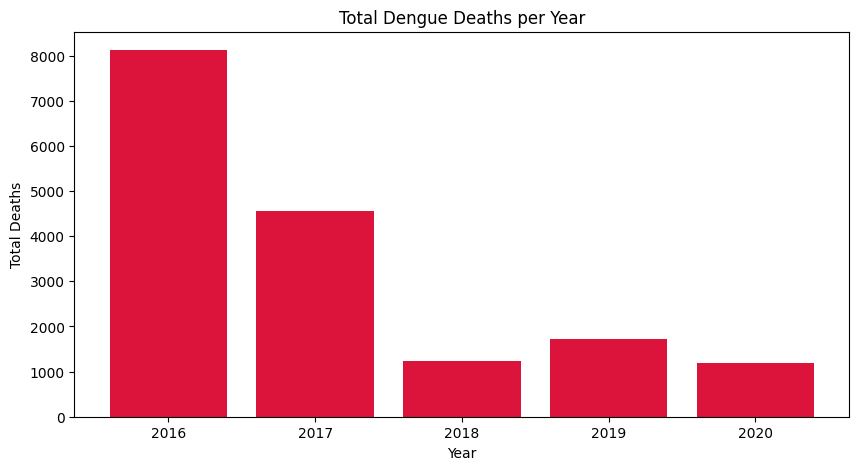

In [92]:
deaths_by_year = dengue.groupby("Year")["Dengue_Deaths"].sum()

plt.figure(figsize=(10,5))
plt.bar(deaths_by_year.index, deaths_by_year.values, color='crimson')
plt.title("Total Dengue Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()

<h1>Insight 8</h1>

<h2>The result shows how the number of dengue deaths changes each year. This helps in identifying which year had the most or fewest fatalities.
</h2>
<hr>

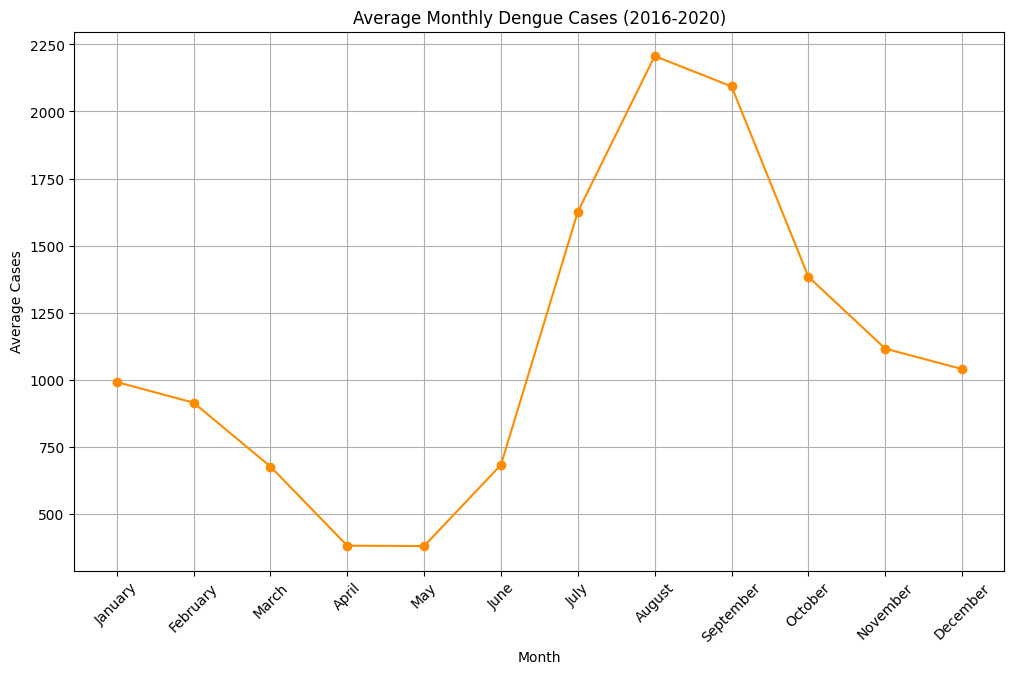

In [108]:
monthly_avg = dengue.groupby(["Year", "Month"])["Dengue_Cases"].mean().unstack()

plt.figure(figsize=(12,7))
plt.plot(monthly_avg.columns, monthly_avg.mean(), marker='o', color='darkorange')
plt.title("Average Monthly Dengue Cases (2016-2020)")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1>Insight 9</h1>

<h2>The graph shows that dengue cases tend to increase during the middle months of the year, suggesting that outbreaks are more common during the rainy season.</h2>

<h1>Insight 10</h1>

<h2>Cases drop sharply towards the end of the year, especially from October to December.</h2>